In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, f1_score,recall_score, roc_curve, roc_auc_score

# Data Cleaning

In [104]:
df = pd.read_csv('titanic3.csv')
df = df.drop(columns=['name','ticket','cabin','boat','body','home.dest'])
df['sex'].replace({'female':0,'male':1},inplace=True) # female: 0 , male: 1
train_df = df.sample(frac=0.8, random_state=42)
test_df = df.drop(train_df.index)
train_df

,pclass,survived,sex,age,sibsp,parch,fare,embarked
701,3.0,0.0,1.0,17.0,0.0,0.0,8.6625,S
994,3.0,0.0,1.0,NaN,0.0,0.0,7.2292,C
350,2.0,1.0,0.0,15.0,0.0,2.0,39.0000,S
986,3.0,0.0,1.0,22.0,0.0,0.0,7.1250,S
409,2.0,0.0,1.0,36.0,0.0,0.0,13.0000,S
...,...,...,...,...,...,...,...,...
180,1.0,1.0,0.0,39.0,0.0,0.0,211.3375,S
301,1.0,0.0,1.0,47.0,0.0,0.0,34.0208,S
496,2.0,0.0,1.0,30.0,0.0,0.0,13.0000,S
1132,3.0,0.0,1.0,NaN,0.0,0.0,7.8958,S


In [105]:
train_df['survived'] = train_df['survived'].fillna(train_df['survived'].mode()[0])
train_df['sex'] = train_df['sex'].fillna(train_df['sex'].mode()[0])
train_df['age'] = train_df['age'].fillna(train_df['age'].mean())
train_df['sibsp'] = train_df['sibsp'].fillna(train_df['sibsp'].mean())
train_df['parch'] = train_df['parch'].fillna(train_df['parch'].mean())
train_df['fare'] = train_df['fare'].fillna(train_df['fare'].mean())
train_df['pclass'] = train_df['pclass'].fillna(train_df['pclass'].mode()[0])
train_df['embarked'] = train_df['embarked'].fillna(train_df['embarked'].mode()[0])
train_df = pd.get_dummies(train_df, columns=['embarked'])
train_df = pd.get_dummies(train_df, columns=['pclass'])
train_df

,survived,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,pclass_1.0,pclass_2.0,pclass_3.0
701,0.0,1.0,17.000000,0.0,0.0,8.6625,False,False,True,False,False,True
994,0.0,1.0,30.004172,0.0,0.0,7.2292,True,False,False,False,False,True
350,1.0,0.0,15.000000,0.0,2.0,39.0000,False,False,True,False,True,False
986,0.0,1.0,22.000000,0.0,0.0,7.1250,False,False,True,False,False,True
409,0.0,1.0,36.000000,0.0,0.0,13.0000,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
180,1.0,0.0,39.000000,0.0,0.0,211.3375,False,False,True,True,False,False
301,0.0,1.0,47.000000,0.0,0.0,34.0208,False,False,True,True,False,False
496,0.0,1.0,30.000000,0.0,0.0,13.0000,False,False,True,False,True,False
1132,0.0,1.0,30.004172,0.0,0.0,7.8958,False,False,True,False,False,True


In [106]:
test_df['survived'] = test_df['survived'].fillna(test_df['survived'].mode()[0])
test_df['sex'] = test_df['sex'].fillna(test_df['sex'].mode()[0])
test_df['age'] = test_df['age'].fillna(test_df['age'].mean())
test_df['sibsp'] = test_df['sibsp'].fillna(test_df['sibsp'].mean())
test_df['parch'] = test_df['parch'].fillna(test_df['parch'].mean())
test_df['fare'] = test_df['fare'].fillna(test_df['fare'].mean())
test_df['pclass'] = test_df['pclass'].fillna(test_df['pclass'].mode()[0])
test_df['embarked'] = test_df['embarked'].fillna(test_df['embarked'].mode()[0])
test_df = pd.get_dummies(test_df, columns=['embarked'])
test_df = pd.get_dummies(test_df, columns=['pclass'])
test_df

,survived,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,pclass_1.0,pclass_2.0,pclass_3.0
1,1.0,1.0,0.916700,1.0,2.0,151.5500,False,False,True,True,False,False
8,1.0,0.0,53.000000,2.0,0.0,51.4792,False,False,True,True,False,False
13,1.0,0.0,26.000000,0.0,0.0,78.8500,False,False,True,True,False,False
14,1.0,1.0,80.000000,0.0,0.0,30.0000,False,False,True,True,False,False
16,0.0,1.0,24.000000,0.0,1.0,247.5208,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1277,1.0,1.0,22.000000,0.0,0.0,7.2250,True,False,False,False,False,True
1287,0.0,1.0,51.000000,0.0,0.0,7.7500,False,False,True,False,False,True
1290,1.0,0.0,47.000000,1.0,0.0,7.0000,False,False,True,False,False,True
1294,0.0,1.0,28.500000,0.0,0.0,16.1000,False,False,True,False,False,True


In [107]:
df = pd.concat([train_df, test_df])
x = df.drop('survived', axis=1)
y = df['survived']

x_train = train_df.drop('survived', axis=1)
y_train = train_df['survived']

x_test = test_df.drop('survived', axis=1)
y_test = test_df['survived']

In [108]:
#sns.pairplot(data=df, hue='survived', palette={0: 'blue', 1: 'orange'}, height=10)
#plt.show()

## KNN

In [109]:
best_score = 0
for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5)
    mean_score = scores.mean()
    if mean_score > best_score:
        best_score = mean_score
        best_k = k
print(f'The best K is {best_k} with a cross validation score of {best_score}')

The best K is 20 with a cross validation score of 0.7061289587605378


In [110]:
# function for assessing model
def assessment(model, x, y, model_name):
    y_pred = model.predict(x)
    accuracy = accuracy_score(y,y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    assessmentDF = pd.DataFrame({'Metric':['Accuracy','Precision','Recall','F1 Score'], 
                                 model_name:[round(accuracy, 4), round(precision, 4), round(recall, 4), round(f1, 4)]})
    return assessmentDF

In [ ]:
# creating function for plotting ROC curve and calculating accuracy for training and testing

def model_assessment(model, x_train, y_train, x_test, y_test):

    # TRAINING
    # prediction
    y_pred_train = model.predict(x_train)
    y_pred_binary_train = (y_pred_train > 0.5).astype(int)

    # confusion matrix
    conf_matrix_train = confusion_matrix(y_train, y_pred_binary_train)
    print('Confusion Matrix Training:')
    print(conf_matrix_train)
    
    # plot test curves
    fpr, tpr, thresholds = roc_curve(y_train, y_pred_train)
    roc_auc_train = roc_auc_score(y_train, y_pred_train)

    plt.plot(fpr, tpr, label=f'ROC curve Training AUC {roc_auc_train}')
    plt.plot([0, 1], [0, 1], '-')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
    
    # Misclassification rate
    tp = conf_matrix_train[0][0]
    fp = conf_matrix_train[0][1]
    fn = conf_matrix_train[1][0]
    tn = conf_matrix_train[1][1]
    misclassif_train = (fp+fn)/(tp+tn+fp+fn)
    print(f'Misclassification rate Training: {round(misclassif_train,4)}')

    # accuracy
    accuracy_train = accuracy_score(y_train, y_pred_binary_train)
    print(f'Train Accuracy: {round(accuracy_train, 4)}')
    print(f'1 - Train Accuracy: {round(1-accuracy_train, 4)}')

    # TESTING
    # prediction
    y_pred_test = model.predict(x_test)
    y_pred_binary_test = (y_pred_test > 0.5).astype(int)

    # confusion matrix
    conf_matrix_test = confusion_matrix(y_test, y_pred_binary_test)
    print('Confusion Matrix Testing (Balanced):')
    print(conf_matrix_test)
    
    # plot test curves
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)

    plt.plot(fpr, tpr, label=f'ROC curve Testing (balanced) AUC {roc_auc_test}')
    plt.plot([0, 1], [0, 1], '-')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
    
    # Misclassification rate
    tp = conf_matrix_test[0][0]
    fp = conf_matrix_test[0][1]
    fn = conf_matrix_test[1][0]
    tn = conf_matrix_test[1][1]
    misclassif_test = (fp+fn)/(tp+tn+fp+fn)
    print(f'Misclassification rate Testing: {round(misclassif_test,4)}')

    # accuracy
    accuracy = accuracy_score(y_test, y_pred_binary_test)
    print(f'Test Accuracy: {round(accuracy, 4)}')
    print(f'1 - Test Accuracy: {round(1-accuracy, 4)}')

In [112]:
knn = neighbors.KNeighborsClassifier(n_neighbors=21, metric="euclidean")
knn.fit(x_train, y_train)
knn_results = assessment(knn, x_test, y_test, 'KNN')
knn_results

,Metric,KNN
0,Accuracy,0.6794
1,Precision,0.6620
2,Recall,0.4393
3,F1 Score,0.5281


## Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [9]:
model = LogisticRegression(max_iter=500)
model.fit(x_train,y_train)
cv = StratifiedKFold(n_splits=5)
rfecv = RFECV(estimator=model, cv=cv, scoring='accuracy')
rfecv.fit(x, y)
cross_val_scores = cross_val_score(model, x, y, cv=cv)
    
selected_features = {'selected_features': x.columns[rfecv.support_], 'score': cross_val_scores.mean()}
selected_features

{'selected_features': Index(['sex'], dtype='object'),
 'score': 0.7122137404580153}

In [10]:
model = LogisticRegression(max_iter=500)
model.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [13]:
assessment(model, x_test, y_test, 'Log Reg')

,Metric,Log Reg
0,Accuracy,0.7786
1,Precision,0.7294
2,Recall,0.6392
3,F1 Score,0.6813


## L1 Penalized Logistic Regression

In [14]:
model = LogisticRegression(max_iter=500, penalty='l1', solver='liblinear')
model.fit(x_train,y_train)

LogisticRegression(max_iter=500, penalty='l1', solver='liblinear')

In [15]:
assessment(model, x_test, y_test, 'Log Reg')

,Metric,Log Reg
0,Accuracy,0.7710
1,Precision,0.7126
2,Recall,0.6392
3,F1 Score,0.6739


## XGBoost Classification

In [17]:
!pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.2/99.8 MB 2.6 MB/s eta 0:00:38
   ---------------------------------------- 0.8/99.8 MB 6.6 MB/s eta 0:00:16
   ---------------------------------------- 1.0/99.8 MB 7.3 MB/s eta 0:00:14
    --------------------------------------- 1.6/99.8 MB 8.0 MB/s eta 0:00:13
    --------------------------------------- 2.4/99.8 MB 9.4 MB/s eta 0:00:11
   - -------------------------------------- 3.2/99.8 MB 10.8 MB/s eta 0:00:09
   - -------------------------------------- 4.3/99.8 MB 12.4 MB/s eta 0:00:08
   - -------------------------------------- 5.0/99.8 MB 12.3 MB/s eta 0:00:08
   -- ------------------------------------- 5.8/99.8 MB 13.2 MB/s eta 0:00:08
   -- ------------------------------------- 6.4/99.8 MB 13.2 MB/s eta 0:00:08
   -- ------------------------------------- 7.1/99.8 MB 13.4 MB/s eta 0:00:07
   --- 

In [20]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [29]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic")
param_grid = {'alpha': np.arange(1,4,0.2)}
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)
best_alpha = grid_search.best_params_['alpha']
best_alpha

2.1999999999999997

In [30]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", alpha = best_alpha)
xgb_model.fit(x_train, y_train)
assessment(xgb_model, x_test, y_test, 'XGBoost')

,Metric,XGBoost
0,Accuracy,0.7939
1,Precision,0.7722
2,Recall,0.6289
3,F1 Score,0.6932


## Decision Trees

In [31]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [32]:
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [33]:
assessment(tree_classifier, x_test, y_test, 'Tree Classifier')

,Metric,Tree Classifier
0,Accuracy,0.7557
1,Precision,0.6737
2,Recall,0.6598
3,F1 Score,0.6667


In [39]:
tree = DecisionTreeClassifier()
alphas = np.linspace(0, 1, 20)
param_grid = {'ccp_alpha': alphas}
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=10, scoring='accuracy')
grid_search.fit(x, y)
best_alpha = grid_search.best_params_['ccp_alpha']
print(f'Best alpha: {best_alpha:.2f}')
print(f'Mean Accuracy: {grid_search.best_score_:.2f}')

Best alpha: 0.05
Mean Accuracy: 0.78


Decision Tree for the whole Titanic data


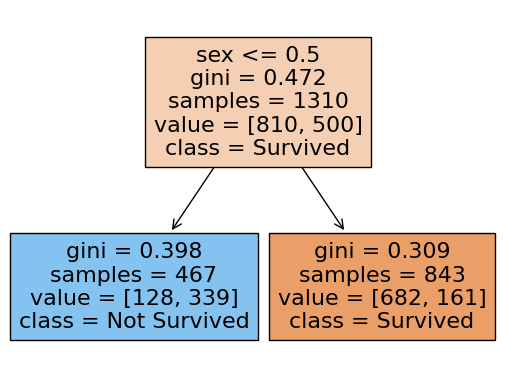

In [40]:
tree = DecisionTreeClassifier(ccp_alpha=0.05)
model = tree.fit(x, y)
plot_tree(model, filled=True, feature_names=x.columns.tolist(), class_names=['Survived', 'Not Survived'])
print('Decision Tree for the whole Titanic data')
plt.show()

## Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rdm_forest = RandomForestClassifier(max_depth=5, random_state=13, oob_score=True)
rdm_forest.fit(x_train, y_train)
assessment(rdm_forest, x_test, y_test, 'Random forest')

,Metric,Random forest
0,Accuracy,0.8092
1,Precision,0.7975
2,Recall,0.6495
3,F1 Score,0.7159


## SVM

In [47]:
from sklearn.svm import SVC

In [50]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100],  # SVM penalty
              'gamma': np.arange(1, 2.1, 0.1)}  # Gaussian Kernel

svm_modelCV = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=10, scoring='accuracy')
svm_modelCV.fit(x_train, y_train)

best_C = svm_modelCV.best_params_['C']
best_gamma= svm_modelCV.best_params_['gamma']
print(best_C)
print(best_gamma)

1
1.2000000000000002


In [51]:
svm_model = SVC(kernel='rbf', C=best_C,  gamma=best_gamma)
svm_model.fit(x_train, y_train)
assessment(svm_model, x_test, y_test, 'SVM')

,Metric,SVM
0,Accuracy,0.6641
1,Precision,0.6452
2,Recall,0.2062
3,F1 Score,0.3125


# Results

In [52]:
tables = [assessment(knn, x_test, y_test, 'KNN'),assessment(svm_model, x_test, y_test, 'SVM')]
combined_table = pd.concat(tables, axis=1)
combined_table

NameError: name 'knn' is not defined

## Clustering?
After creating several binary classification models, we thought that maybe a clustering approach would give us information about similar groups in the passengers of the titanic, giving insights about the survival of them

In [54]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, hamming_loss, calinski_harabasz_score

In [55]:
k_values = range(2, 5)
best_score = -1
best_k = -1
rand = np.random.randint(1000)

for k in k_values:
    cluster = KMeans(n_clusters=k)
    cluster_labels = cluster.fit_predict(x) 
    score = silhouette_score(x, y)
    if score > best_score:
        best_score = score
        best_k = k

print(f'The best k is {best_k} with a silhouette score of {best_score}')


The best k is 2 with a silhouette score of 0.11944392602714085


In [56]:
kmeans = KMeans(n_clusters=best_k)
cluster_assignments = kmeans.fit_predict(x)
df_clusters = df.copy()
df_clusters['clusters'] = cluster_assignments
df_clusters

,pclass,survived,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,clusters
0,1.0,1.0,0,29.0000,0.0,0.0,211.3375,False,False,True,1
1,1.0,1.0,1,0.9167,1.0,2.0,151.5500,False,False,True,1
2,1.0,0.0,0,2.0000,1.0,2.0,151.5500,False,False,True,1
3,1.0,0.0,1,30.0000,1.0,2.0,151.5500,False,False,True,1
4,1.0,0.0,0,25.0000,1.0,2.0,151.5500,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,0,0.0000,1.0,0.0,14.4542,True,False,False,0
1306,3.0,0.0,1,26.5000,0.0,0.0,7.2250,True,False,False,0
1307,3.0,0.0,1,27.0000,0.0,0.0,7.2250,True,False,False,0
1308,3.0,0.0,1,29.0000,0.0,0.0,7.8750,False,False,True,0


In [61]:
y_pred = df_clusters['clusters']
y = df_clusters['survived']
accuracy = accuracy_score(y,y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
assessmentDF = pd.DataFrame({'Metric':['Accuracy','Precision','Recall','F1 Score'], 
                                 'KMeans':[round(accuracy, 4), round(precision, 4), round(recall, 4), round(f1, 4)]})
assessmentDF

,Metric,KMeans
0,Accuracy,0.6420
1,Precision,0.7183
2,Recall,0.1020
3,F1 Score,0.1786


## Neural Networks?
It might seem overkill, but could we get better results by using Neural Networks? We surely don't have thousands of rows nor much complexity, but we will never now unless we try it.

In [63]:
pip install tensorflow

     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/376.9 MB ? eta -:--:--
   ---------------------------------------- 0.4/376.9 MB 13.2 MB/s eta 0:00:29
   ---------------------------------------- 1.3/376.9 MB 16.4 MB/s eta 0:00:23
   ---------------------------------------- 2.4/376.9 MB 19.5 MB/s eta 0:00:20
   ---------------------------------------- 3.6/376.9 MB 20.8 MB/s eta 0:00:18
   ---------------------------------------- 4.6/376.9 MB 20.8 MB/s eta 0:00:18
    --------------------------------------- 5.7/376.9 MB 21.6 MB/s eta 0:00:18
    --------------------------------------- 6.6/376.9 MB 21.0 MB/s eta 0:00:18
    --------------------------------------- 7.8/376.9 MB 21.6 MB/s eta 0:00:18
    --------------------------------------- 8.8/376.9 MB 21.6 MB/s eta 0:00:18
   - -------------------------------------- 9.8/376.9 MB 21.7 MB/s

In [69]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

Epoch 1/80
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5674 - loss: 1.7995 - val_accuracy: 0.6714 - val_loss: 0.6634
Epoch 2/80
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6794 - loss: 0.6396 - val_accuracy: 0.7000 - val_loss: 0.6117
Epoch 3/80
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6833 - loss: 0.6118 - val_accuracy: 0.7190 - val_loss: 0.5838
Epoch 4/80
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6909 - loss: 0.5998 - val_accuracy: 0.7048 - val_loss: 0.5506
Epoch 5/80
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6919 - loss: 0.5835 - val_accuracy: 0.7000 - val_loss: 0.5528
Epoch 6/80
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6849 - loss: 0.5735 - val_accuracy: 0.6857 - val_loss: 0.5572
Epoch 7/80
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7309 - loss: 0.5438 - val_accuracy: 0.7286 - val_loss: 0.5247
Epoch 8/80
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7285 - loss: 0.5567 - val_accuracy: 0.6952 - val_loss:

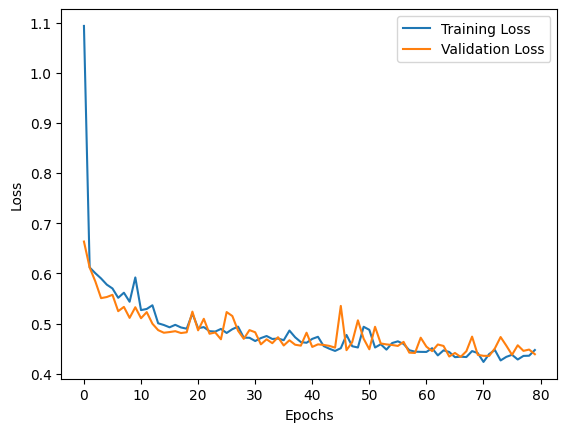

In [73]:
# Define the architecture of your neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
x_nn_train, x_nn_val, y_nn_train, y_nn_val = train_test_split(x_train, y_train, test_size=0.2)
history = model.fit(x_train, y_train, epochs=80, batch_size=32, validation_data=(x_nn_val, y_nn_val), callbacks=[early_stopping])

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [76]:
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
assessmentDF = pd.DataFrame({'Metric':['Accuracy','Precision','Recall','F1 Score'], 
                                 'Neural Network':[round(accuracy, 4), round(precision, 4), round(recall, 4), round(f1, 4)]})
assessmentDF

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step


,Metric,Neural Network
0,Accuracy,0.7786
1,Precision,0.7191
2,Recall,0.6598
3,F1 Score,0.6882
